In [1]:
# pitches shape (1025, 9376)
# RMSE shape (9376,)

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/home/mounika.k'

In [3]:
# mfcc, pitches, rmse
# 20 + 1025 + 1 

In [4]:
path = '/ssd_scratch/users/mounika.k/chess_features/'

In [6]:
df = pd.read_csv('chess/cleaned_chess_dataset.csv')
df.shape

(8162, 19)

In [6]:
filenames = os.listdir('/ssd_scratch/users/mounika.k/chess_audio/')
fnames = []
for fname in filenames:
    fnames.append(fname[:-4])

In [7]:
scores = list(df[df['videoid'].isin(fnames)]['commentsToViewsRatio'])

Text(0.5, 1.0, 'Distribution of scores')

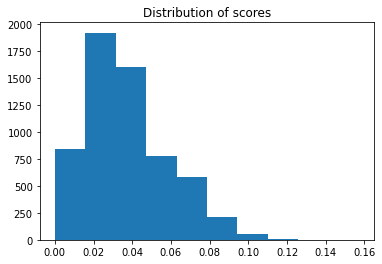

In [8]:
plt.hist(scores)
plt.title('Distribution of scores')

In [9]:
df[df['videoid'].isin(fnames)].groupby('channelTitle')['commentsToViewsRatio'].mean()

channelTitle
Chess School                 0.056407
Chess.com                    0.019610
agadmator's Chess Channel    0.033090
Name: commentsToViewsRatio, dtype: float64

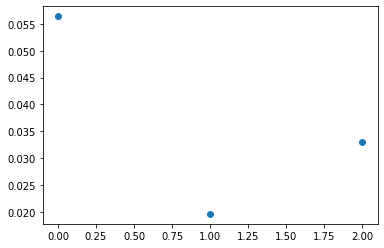

In [10]:
plt.scatter([0, 1, 2], [0.056407, 0.019610, 0.033090 ])

#### Can we bring the scores to 0-1 scale?

In [ ]:
pfiles = os.listdir(path + 'pitches/')
pitches_data = []
for file in pfiles:
    pitches_data.append(np.load(path + 'pitches/' + file))

In [5]:
pfiles = os.listdir(path + 'pitches/')
pdata = np.load(path + 'pitches/' + pfiles[0])

In [7]:
pdata

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
rfiles = os.listdir(path + 'rmse/')
rmse_data = []
for file in rfiles:
    rmse_data.append(np.load(path + 'rmse/' + file))

In [51]:
rmse_data

[array([2.2226191e-04, 2.1440882e-04, 3.2972830e-04, ..., 7.5123193e-05,
        7.6337899e-05, 7.3103423e-05], dtype=float32),
 array([0.00022226, 0.00021441, 0.00032973, ..., 0.09419094, 0.11958973,
        0.12551899], dtype=float32),
 array([0.00045275, 0.0011127 , 0.00149121, ..., 0.00662897, 0.00712838,
        0.00824196], dtype=float32),
 array([0.00224667, 0.00390762, 0.00421448, ..., 0.01246954, 0.01090515,
        0.01208729], dtype=float32),
 array([0.00098143, 0.00087856, 0.00098269, ..., 0.04729391, 0.0372611 ,
        0.03443051], dtype=float32),
 array([0.00020457, 0.00036329, 0.00052926, ..., 0.05166001, 0.07022165,
        0.07128166], dtype=float32),
 array([0.0000000e+00, 5.1946256e-07, 1.5652212e-06, ..., 4.9932733e-02,
        2.2772474e-02, 1.6412217e-02], dtype=float32),
 array([0.00126316, 0.00133769, 0.00155979, ..., 0.01359057, 0.0092543 ,
        0.00686164], dtype=float32),
 array([0.0000000e+00, 5.3024570e-07, 1.0645023e-06, ..., 6.8038821e-02,
        6.1

In [52]:
rmse_arr = np.vstack(rmse_data)

In [53]:
rmse_arr.shape

(6017, 9376)

In [54]:
rmse_mean = np.mean(rmse_arr, axis=1)

In [55]:
rmse_mean.shape

(6017,)

Text(0.5, 1.0, 'Distribution of RMS Intensity')

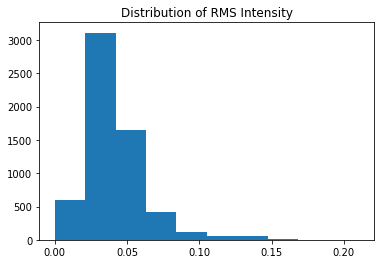

In [56]:
plt.hist(rmse_mean)
plt.title('Distribution of RMS Intensity')

In [57]:
rmse_mean.shape

(6017,)

In [58]:
len(scores)

6017

Text(0.5, 1.0, 'Relationship between scores and RMS Intensity')

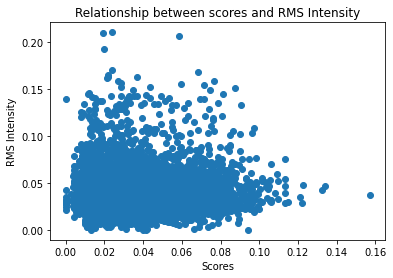

In [59]:
plt.scatter(scores, rmse_mean)
plt.xlabel('Scores')
plt.ylabel('RMS Intensity')
plt.title('Relationship between scores and RMS Intensity')

There doesn't seem to be any pattern or relation between the scores and RMS intensity values. 
Try outlier filtering

In [104]:
vcfiles = os.listdir(path + 'vc/')
vc_data = []
for file in vcfiles:
    vc_data.append(np.load(path + 'vc/' + file))
    

In [105]:
sizes = []
for i in vc_data:
    sizes.append(i.shape[0])
sizes

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [106]:
vc = map(lambda x:vc_data[x], list(np.where(np.array(sizes)==5)[0]))
vc_arr = np.vstack(vc)

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [128]:
vc_arr

array([[2.99034979e+02, 2.40657859e+00, 4.17978881e+00, 2.39246537e-01,
        2.10000000e+01],
       [2.98954979e+02, 2.76989863e+00, 4.43001535e+00, 2.25732852e-01,
        1.70000000e+01],
       [2.95750138e+02, 4.02628717e+00, 4.59207094e+00, 2.17766671e-01,
        0.00000000e+00],
       ...,
       [2.98374138e+02, 2.54309363e+00, 3.11675191e+00, 3.20846839e-01,
        8.00000000e+00],
       [2.98870138e+02, 2.68974648e+00, 4.32368978e+00, 2.31283938e-01,
        2.30000000e+01],
       [2.96422138e+02, 2.50309740e+00, 3.90028284e+00, 2.56391662e-01,
        3.60000000e+01]])

In [129]:
files

['-0cvmd4UoYY',
 '-0gRIj0vkIU',
 '-18a84JHLdo',
 '-1EV8tt20hg',
 '-1mropfKtEw',
 '-2-lW9rYmh4',
 '-2Q2OHFZXWg',
 '-3otg-asbvc',
 '-4zG5MwvJXU',
 '-52He4PF-NA',
 '-5D2tjLVp48',
 '-5IoH91GAzA',
 '-5u5uuMdAJc',
 '-6QX53BmDbg',
 '-6hO5K0m16Y',
 '-6kZWBE2jdw',
 '-6vZkBxckU0',
 '-7PI9Q9uoSE',
 '-7VLF0XQghw',
 '-81MwXjQhZA',
 '-8Un1-oS4_A',
 '-8hZeVtAGhc',
 '-9NIze9FCIA',
 '-9PMGdZYZFA',
 '-9cCbATiUTQ',
 '-AaAqhgqZbs',
 '-BkW9a150wk',
 '-BwjT9Cvp18',
 '-BzocnDPuIs',
 '-CDQH2XHzJM',
 '-CoYV4tVouk',
 '-CyvFxV_ONE',
 '-D0gznjeySE',
 '-DFX-x_Q_LQ',
 '-EDzMUhSBXw',
 '-Eco8zfPvhI',
 '-En_grRzx3g',
 '-GEsoR1Owoc',
 '-GYrlMBb2hs',
 '-GpYhKU1iGs',
 '-Hwx8QQQyQ8',
 '-HyL_zMmaGI',
 '-JQQt8XG0iA',
 '-JfkU8dnjHI',
 '-JfqhOaXjVg',
 '-NozSoqprUM',
 '-O4L1Jn5vT8',
 '-OOwx7Q4q0U',
 '-O_9OMk2Qz8',
 '-Q48ab6q1Qs',
 '-Qi_f_tOmS4',
 '-QxhynY7Cyg',
 '-UNGDPtsEeg',
 '-UdpVy1aft0',
 '-W1cNB7LO0E',
 '-WXEeY-VO8U',
 '-WuYsCApZXo',
 '-YA5YsW_-kI',
 '-ZNS8LP_0Mg',
 '-ZSHtlS3ABY',
 '-ZWGaSGPRH8',
 '-ZxQABkfSU0',
 '-_W8jb

In [130]:
vc_df = pd.DataFrame( vc_arr, columns=['pausedur', 'speakingrate', 'articulationrate', 'asd', 'unvoicedcount'])

In [131]:
vc_df

,pausedur,speakingrate,articulationrate,asd,unvoicedcount
0,299.034979,2.406579,4.179789,0.239247,21.0
1,298.954979,2.769899,4.430015,0.225733,17.0
2,295.750138,4.026287,4.592071,0.217767,0.0
3,298.988277,2.989718,4.543379,0.220100,6.0
4,296.357490,4.269844,4.751105,0.210477,2.0
...,...,...,...,...,...
6008,297.781490,4.083184,4.672238,0.214030,17.0
6009,298.838138,2.433104,4.251153,0.235230,8.0
6010,298.374138,2.543094,3.116752,0.320847,8.0
6011,298.870138,2.689746,4.323690,0.231284,23.0


In [132]:
files = [f.replace('.npy', '') for f in rfiles] 

In [133]:
files.sort()
files

['-0cvmd4UoYY',
 '-0gRIj0vkIU',
 '-18a84JHLdo',
 '-1EV8tt20hg',
 '-1mropfKtEw',
 '-2-lW9rYmh4',
 '-2Q2OHFZXWg',
 '-3otg-asbvc',
 '-4zG5MwvJXU',
 '-52He4PF-NA',
 '-5D2tjLVp48',
 '-5IoH91GAzA',
 '-5u5uuMdAJc',
 '-6QX53BmDbg',
 '-6hO5K0m16Y',
 '-6kZWBE2jdw',
 '-6vZkBxckU0',
 '-7PI9Q9uoSE',
 '-7VLF0XQghw',
 '-81MwXjQhZA',
 '-8Un1-oS4_A',
 '-8hZeVtAGhc',
 '-9NIze9FCIA',
 '-9PMGdZYZFA',
 '-9cCbATiUTQ',
 '-AaAqhgqZbs',
 '-BkW9a150wk',
 '-BwjT9Cvp18',
 '-BzocnDPuIs',
 '-CDQH2XHzJM',
 '-CoYV4tVouk',
 '-CyvFxV_ONE',
 '-D0gznjeySE',
 '-DFX-x_Q_LQ',
 '-EDzMUhSBXw',
 '-Eco8zfPvhI',
 '-En_grRzx3g',
 '-GEsoR1Owoc',
 '-GYrlMBb2hs',
 '-GpYhKU1iGs',
 '-Hwx8QQQyQ8',
 '-HyL_zMmaGI',
 '-JQQt8XG0iA',
 '-JfkU8dnjHI',
 '-JfqhOaXjVg',
 '-NozSoqprUM',
 '-O4L1Jn5vT8',
 '-OOwx7Q4q0U',
 '-O_9OMk2Qz8',
 '-Q48ab6q1Qs',
 '-Qi_f_tOmS4',
 '-QxhynY7Cyg',
 '-UNGDPtsEeg',
 '-UdpVy1aft0',
 '-W1cNB7LO0E',
 '-WXEeY-VO8U',
 '-WuYsCApZXo',
 '-YA5YsW_-kI',
 '-ZNS8LP_0Mg',
 '-ZSHtlS3ABY',
 '-ZWGaSGPRH8',
 '-ZxQABkfSU0',
 '-_W8jb

In [134]:
files[3412]

'ZLLMaQQKdfg'

In [135]:
files[3341]

'Ybmhn-2mNTA'

In [136]:
files = list(np.array(files)[np.where(np.array(sizes)==5)[0]])

In [137]:
vc_df['filenames'] = files

In [138]:
list(rmse_mean[np.where(np.array(sizes)==5)[0]])

[0.038176112,
 0.049182665,
 0.035085134,
 0.02126067,
 0.035646953,
 0.04513863,
 0.047888305,
 0.05346088,
 0.08023069,
 0.031998374,
 0.020401752,
 0.044345226,
 0.05281404,
 0.042298824,
 0.073453054,
 0.043515943,
 0.013419551,
 0.052671686,
 0.037144445,
 0.076302305,
 0.067791075,
 0.04209484,
 0.02321753,
 0.019892499,
 0.0334441,
 0.041170396,
 0.032908022,
 0.028742267,
 0.044553954,
 0.024932701,
 0.07156161,
 0.015377199,
 0.043001745,
 0.036082067,
 0.037302945,
 0.029069204,
 0.03379572,
 0.034139514,
 0.04541751,
 0.015620892,
 0.022503475,
 0.023814581,
 0.025841527,
 0.049355593,
 0.023180436,
 0.054774377,
 0.030983033,
 0.035170257,
 0.03984827,
 0.04068872,
 0.03635065,
 0.032389633,
 0.038053654,
 0.029267864,
 0.05541482,
 0.032473013,
 0.026962316,
 0.043767974,
 0.03364421,
 0.005958251,
 0.041327577,
 0.016454054,
 0.036938243,
 0.051666465,
 0.027465058,
 0.054340426,
 0.04347162,
 0.023941975,
 0.03249522,
 0.06718086,
 0.043977827,
 0.04715929,
 0.019708583,

In [139]:
df

,videoid,videoTitle,videoPublishedDate,videoDescription,videoLikeCount,videoDislikeCount,videoViewCount,videoCommentCount,channelID,channelTitle,channelPublishedAt,channelDescription,channelRegionCode,videoCount,channelViewCount,subscriberCount,channelLiveBroadcastContent,videoPublishedYear,commentsToViewsRatio
4976,--lS1DRERZw,Top 10 facts about Viswanathan Anand,2016-12-02,#agadmator This is my 6th video in the top 10 ...,2706,62,128463,151,UCL5YbN5WLFD8dLIegT5QAbA,agadmator's Chess Channel,2007-04-24T10:55:45Z,Hello everyone - This is a chess channel :) He...,IN,2049,393701197,998000,upcoming,2016,0.022722
1313,-0PY2zlnEvc,PRO Chess League: GM Izoria's Classy Checkmate,2017-03-09,GM Zviad Izoria offers both his rooks for a cl...,64,4,3156,5,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2017,0.023131
1615,-0cvmd4UoYY,#ChessMonday Spicy Chess W/ Host GM Simon Will...,2015-12-03,10-5 part1\r\n -- Watch live at http://www.twi...,69,8,3577,12,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2015,0.024881
4736,-0gRIj0vkIU,Carlsen Shows How to Crush a Super GM with 1...b6,2017-09-28,#agadmator Pavel Eljanov vs Magnus Carlsen\nIs...,7012,242,638861,269,UCL5YbN5WLFD8dLIegT5QAbA,agadmator's Chess Channel,2007-04-24T10:55:45Z,Hello everyone - This is a chess channel :) He...,IN,2049,393701197,998000,upcoming,2017,0.011776
3696,-18a84JHLdo,Zugzwang on Demand || Xiong vs Duda || FIDE Wo...,2019-09-21,Follow me on Instagram for extra content https...,2351,25,72292,118,UCL5YbN5WLFD8dLIegT5QAbA,agadmator's Chess Channel,2007-04-24T10:55:45Z,Hello everyone - This is a chess channel :) He...,IN,2049,393701197,998000,upcoming,2019,0.034499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,zygRli1vLuk,How Bad is This Bishop? || Goryachkina VS Ju W...,2020-01-20,Follow me on Instagram for extra content https...,2488,26,78342,278,UCL5YbN5WLFD8dLIegT5QAbA,agadmator's Chess Channel,2007-04-24T10:55:45Z,Hello everyone - This is a chess channel :) He...,IN,2049,393701197,998000,upcoming,2020,0.035639
7847,zz-BdY6TrZs,Short and sweet Vienna Game: NielsenB vs Jensen,2012-02-06,Short and sweet Vienna Game: NielsenB vs Jense...,798,5,36636,29,UCMxK1FKAbmj2N-faTWLwNig,Chess School,2011-02-03T03:17:20Z,Thank you for visiting Chess School channel. H...,IN,3168,89781697,147000,none,2012,0.022710
254,zz3CUWcxwmo,Argentina vs Columbia + Pool E Online Olympiad,2020-08-16,The FIDE Online Olympiad is a major online che...,59,5,3260,6,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2020,0.021472
1590,zzH0ef0I9r8,Using Chess.com: Daily Chess Navigation,2016-01-26,Chess.com Vice President Danny Rensch explains...,29,1,3455,4,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2016,0.009841


In [140]:
vc_df['rms_intensity'] = list(rmse_mean[np.where(np.array(sizes)==5)[0]])

In [141]:
vc_df

,pausedur,speakingrate,articulationrate,asd,unvoicedcount,filenames,rms_intensity
0,299.034979,2.406579,4.179789,0.239247,21.0,-0cvmd4UoYY,0.038176
1,298.954979,2.769899,4.430015,0.225733,17.0,-0gRIj0vkIU,0.049183
2,295.750138,4.026287,4.592071,0.217767,0.0,-18a84JHLdo,0.035085
3,298.988277,2.989718,4.543379,0.220100,6.0,-1EV8tt20hg,0.021261
4,296.357490,4.269844,4.751105,0.210477,2.0,-1mropfKtEw,0.035647
...,...,...,...,...,...,...,...
6008,297.781490,4.083184,4.672238,0.214030,17.0,zvbHHu1hezc,0.033497
6009,298.838138,2.433104,4.251153,0.235230,8.0,zwwd3YLT7DE,0.026789
6010,298.374138,2.543094,3.116752,0.320847,8.0,zxzNReZDB84,0.054134
6011,298.870138,2.689746,4.323690,0.231284,23.0,zygRli1vLuk,0.030721


In [142]:
df = df.sort_values(by=['videoid'])
vc_df = vc_df.sort_values(by=['filenames'])

In [143]:
df.columns 

Index(['videoid', 'videoTitle', 'videoPublishedDate', 'videoDescription',
       'videoLikeCount', 'videoDislikeCount', 'videoViewCount',
       'videoCommentCount', 'channelID', 'channelTitle', 'channelPublishedAt',
       'channelDescription', 'channelRegionCode', 'videoCount',
       'channelViewCount', 'subscriberCount', 'channelLiveBroadcastContent',
       'videoPublishedYear', 'commentsToViewsRatio'],
      dtype='object')

In [144]:
vc_df.columns

Index(['pausedur', 'speakingrate', 'articulationrate', 'asd', 'unvoicedcount',
       'filenames', 'rms_intensity'],
      dtype='object')

In [145]:
cols_to_use = vc_df.columns.difference(df.columns)
cols_to_use

Index(['articulationrate', 'asd', 'filenames', 'pausedur', 'rms_intensity',
       'speakingrate', 'unvoicedcount'],
      dtype='object')

In [146]:
vc_df = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')
vc_df.drop(columns=['filenames'], inplace=True)
vc_df.reset_index(drop=True, inplace=True)

In [147]:
vc_df.columns

Index(['videoid', 'videoTitle', 'videoPublishedDate', 'videoDescription',
       'videoLikeCount', 'videoDislikeCount', 'videoViewCount',
       'videoCommentCount', 'channelID', 'channelTitle', 'channelPublishedAt',
       'channelDescription', 'channelRegionCode', 'videoCount',
       'channelViewCount', 'subscriberCount', 'channelLiveBroadcastContent',
       'videoPublishedYear', 'commentsToViewsRatio', 'pausedur',
       'speakingrate', 'articulationrate', 'asd', 'unvoicedcount',
       'rms_intensity'],
      dtype='object')

In [148]:
vc_df.to_pickle('/ssd_scratch/users/mounika.k/shantanu/chess_embeddings_vc_df.pkl')

In [79]:
vc_df['videoLikeCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['videoLikeCount']
vc_df['videoDislikeCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['videoDislikeCount']
vc_df['videoViewCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['videoViewCount']
vc_df['videoCommentCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['videoCommentCount']
vc_df['channelViewCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['channelViewCount']
vc_df['subscriberCount'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['subscriberCount']

In [80]:
vc_df['scores'] = pd.merge(df, vc_df, left_on='videoid', right_on='filenames')['commentsToViewsRatio']

In [81]:
vc_df.reset_index(drop=True, inplace=True)

In [82]:
vc_df

,pausedur,speakingrate,articulationrate,asd,unvoicedcount,filenames,rms_intensity,videoLikeCount,videoDislikeCount,videoViewCount,videoCommentCount,channelViewCount,subscriberCount,scores
0,299.034979,2.406579,4.179789,0.239247,21.0,-0cvmd4UoYY,0.038176,69,8,3577,12,121653031,569000,0.024881
1,298.954979,2.769899,4.430015,0.225733,17.0,-0gRIj0vkIU,0.049183,7012,242,638861,269,393701197,998000,0.011776
2,295.750138,4.026287,4.592071,0.217767,0.0,-18a84JHLdo,0.035085,2351,25,72292,118,393701197,998000,0.034499
3,298.988277,2.989718,4.543379,0.220100,6.0,-1EV8tt20hg,0.021261,562,34,52701,40,121653031,569000,0.012068
4,296.357490,4.269844,4.751105,0.210477,2.0,-1mropfKtEw,0.035647,751,18,21730,71,121653031,569000,0.038656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,297.781490,4.083184,4.672238,0.214030,17.0,zvbHHu1hezc,0.033497,855,6,20588,58,89781697,147000,0.044638
6009,298.838138,2.433104,4.251153,0.235230,8.0,zwwd3YLT7DE,0.026789,6159,81,181038,321,121653031,569000,0.036241
6010,298.374138,2.543094,3.116752,0.320847,8.0,zxzNReZDB84,0.054134,61,5,2898,3,121653031,569000,0.023810
6011,298.870138,2.689746,4.323690,0.231284,23.0,zygRli1vLuk,0.030721,2488,26,78342,278,393701197,998000,0.035639


In [83]:
vc_df['speakingrate'].corr(vc_df['scores'])

-0.01432714850153563

In [84]:
norm_scores = (vc_df['scores'] - vc_df['scores'].min())/(vc_df['scores'].max() - vc_df['scores'].min())
vc_df['speakingrate'].corr(norm_scores)

-0.014327148501535622

In [85]:
norm_scores.describe()


count    6013.000000
mean        0.237938
std         0.134528
min         0.000000
25%         0.132209
50%         0.212395
75%         0.317955
max         1.000000
Name: scores, dtype: float64

In [86]:
vc_df.scores.describe()

count    6013.000000
mean        0.037417
std         0.021155
min         0.000000
25%         0.020790
50%         0.033400
75%         0.050000
max         0.157255
Name: scores, dtype: float64

In [87]:
vc_df.dtypes

pausedur             float64
speakingrate         float64
articulationrate     float64
asd                  float64
unvoicedcount        float64
filenames             object
rms_intensity        float64
videoLikeCount         int64
videoDislikeCount      int64
videoViewCount         int64
videoCommentCount      int64
channelViewCount       int64
subscriberCount        int64
scores               float64
dtype: object

<Figure size 1080x1080 with 0 Axes>

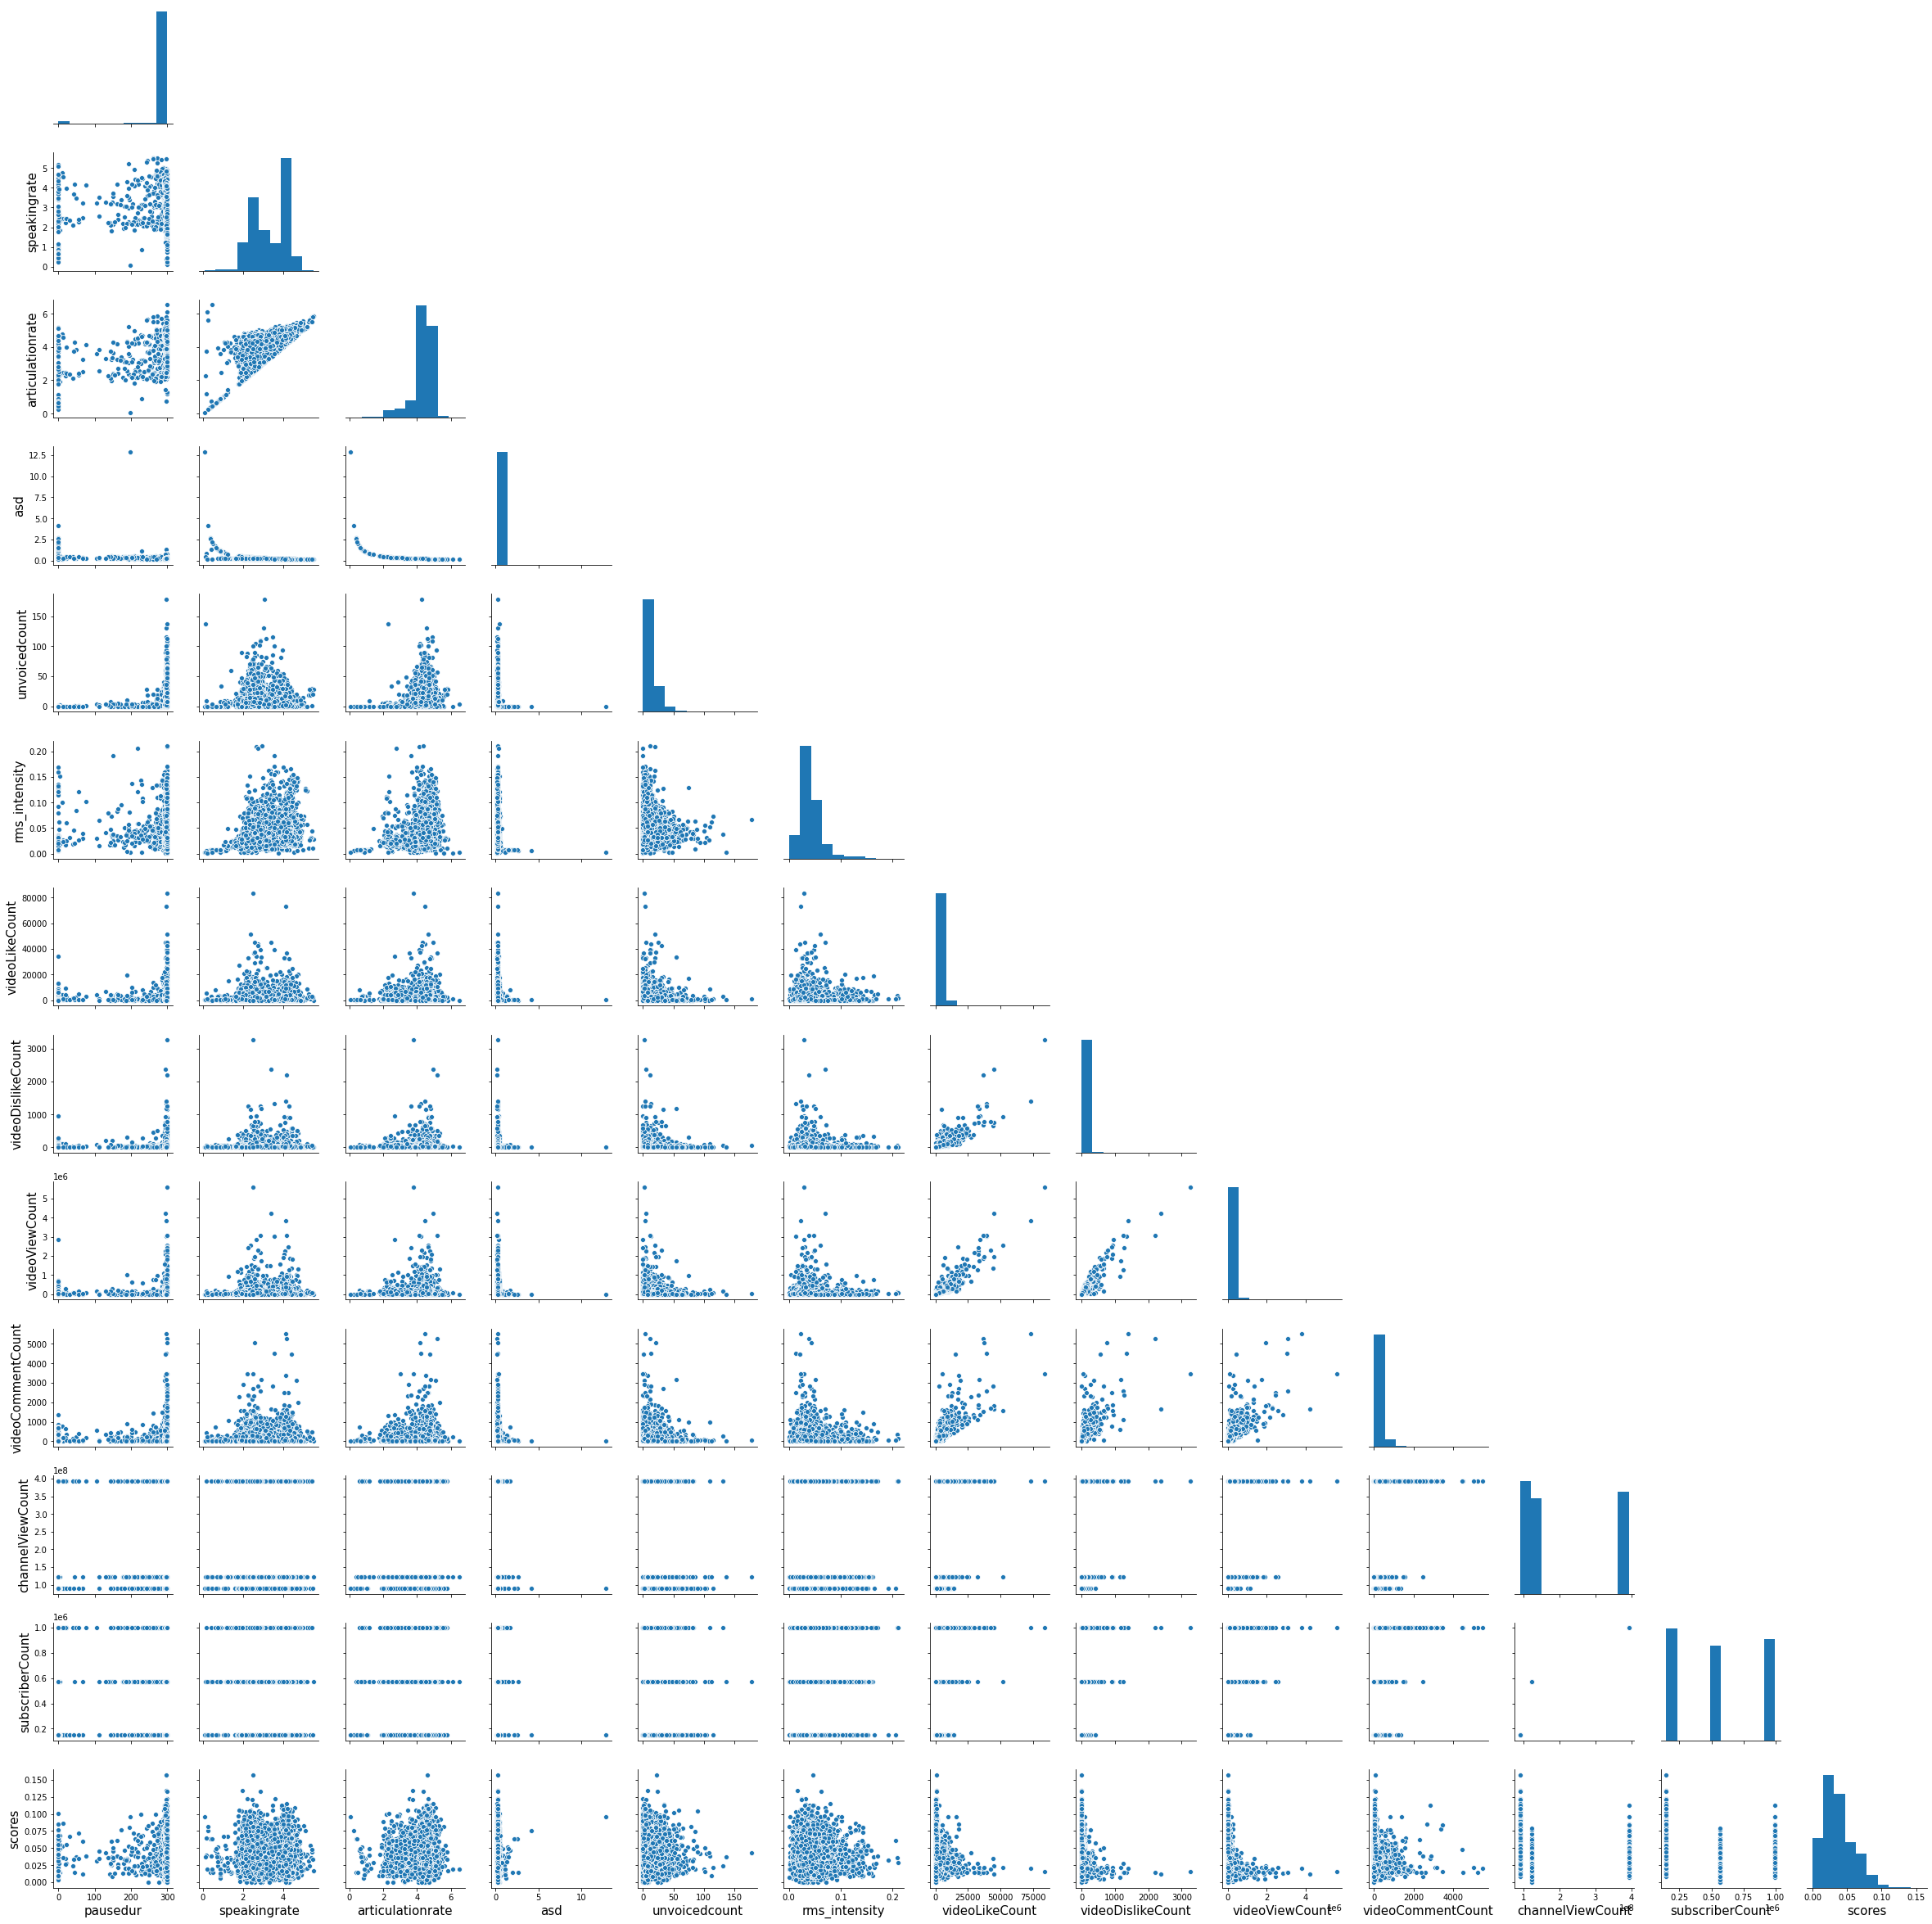

In [88]:
import seaborn as sns
plt.figure(figsize=(15, 15))
plt.rcParams["axes.labelsize"] = 15

sns.pairplot(vc_df, corner=True)
# plt.xlabel(list(vc_df.columns), fontsize=30)
# plt.ylabel(list(vc_df.columns), fontsize=30)
# plt.savefig('pairplot_speech_features.png')

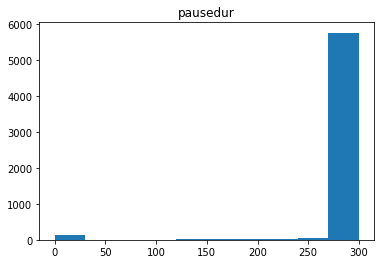

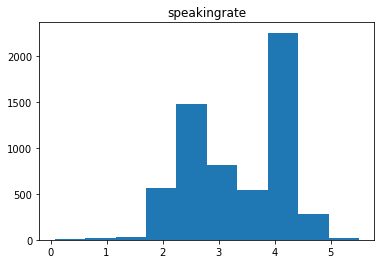

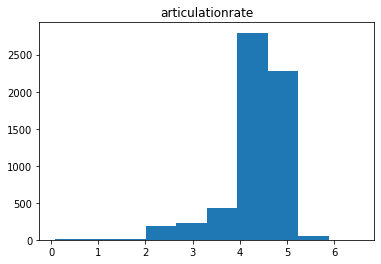

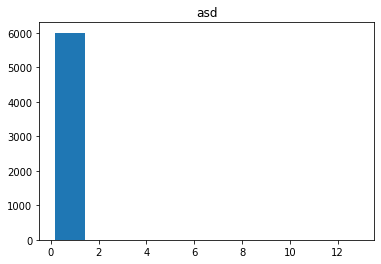

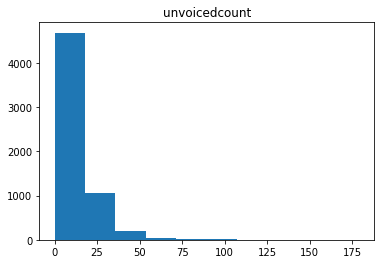

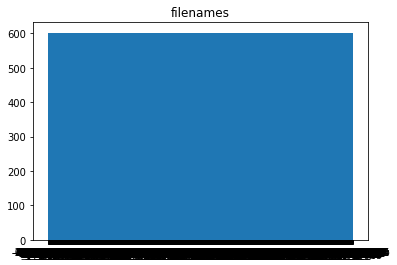

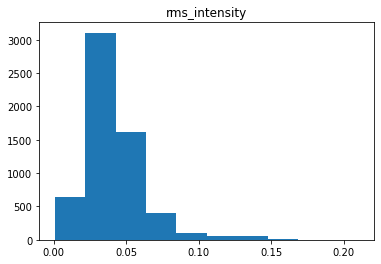

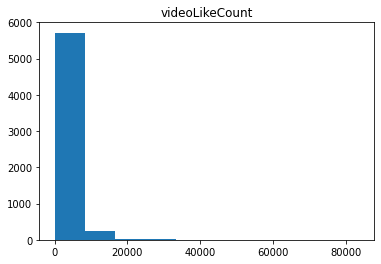

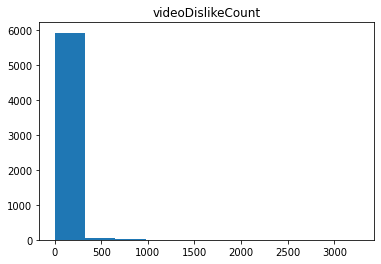

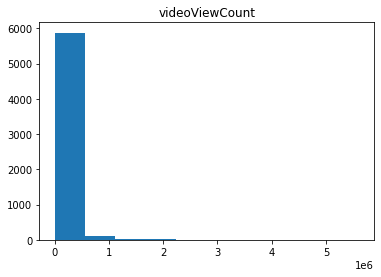

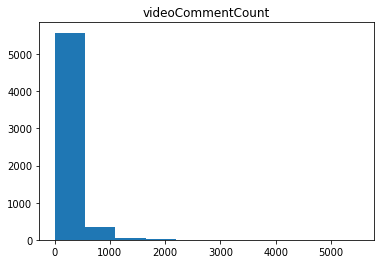

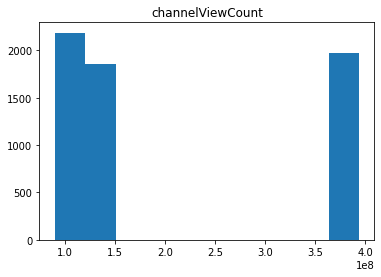

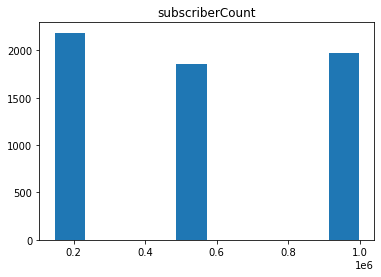

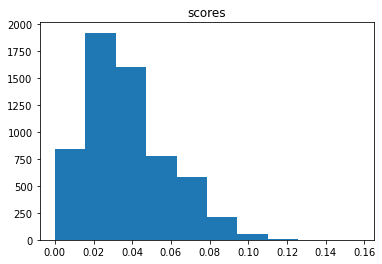

In [54]:
for feature in list(vc_df.columns):
    plt.hist(vc_df[feature])
    plt.title(feature)
    plt.show()
    

In [50]:
vc_df.columns

Index(['pausedur', 'speakingrate', 'articulationrate', 'asd', 'unvoicedcount',
       'filenames', 'rms_intensity', 'videoLikeCount', 'videoDislikeCount',
       'videoViewCount', 'videoCommentCount', 'channelViewCount',
       'subscriberCount', 'scores'],
      dtype='object')

In [45]:
# !pip3 install pandas_profiling --user

In [64]:
from pandas_profiling import ProfileReport

In [65]:
profile = ProfileReport(vc_df, title="Pandas Profiling Report" )

In [66]:
profile.to_file('chess_features_analysis_new.pdf')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/home/mounika.k/.local/lib/python3.7/site-packages/pandas_profiling/profile_report.py:267: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [90]:
vc_df.to_pickle('/ssd_scratch/users/mounika.k/shantanu/chess_embeddings_vc_df.pkl')

## Shantanu

Overview: 
1. We remove outliers per channel using IQR based on video view count. This will probably filter out videos which just recieved really high or low views because of how the match was, and not strongly dependent on the commentary.
2. We then observe how the like and dislike counts and ratios are per channel. The dislike-like ratio should indicate which videos were engaging and which weren't. We again filter out the outliers and take the data points at the extremes to find any patterns w.r.t speech features extracted like pause duration, speaking rate etc.

Results:
1. Dislike-like ratio per channel does not reveal any distinct pattern w.r.t extracted speech features. Need to repeat the experiment for different durations to do conclusive reporting as current data only covers first 5 mins which most likely doesn't capture the entire game properly.

In [168]:
from scipy import stats

In [213]:
vc_df = pd.read_pickle('/ssd_scratch/users/mounika.k/shantanu/chess_embeddings_vc_df.pkl')
vc_df.shape

(6013, 25)

In [214]:
vc_df.columns

Index(['videoid', 'videoTitle', 'videoPublishedDate', 'videoDescription',
       'videoLikeCount', 'videoDislikeCount', 'videoViewCount',
       'videoCommentCount', 'channelID', 'channelTitle', 'channelPublishedAt',
       'channelDescription', 'channelRegionCode', 'videoCount',
       'channelViewCount', 'subscriberCount', 'channelLiveBroadcastContent',
       'videoPublishedYear', 'commentsToViewsRatio', 'pausedur',
       'speakingrate', 'articulationrate', 'asd', 'unvoicedcount',
       'rms_intensity'],
      dtype='object')

array([5.500000e+01, 5.259400e+03, 2.437700e+04, 1.972074e+05,
       3.148862e+05, 5.606876e+06])

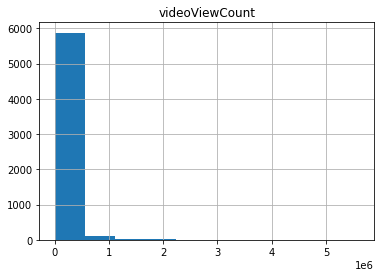

In [215]:
vc_df.hist('videoViewCount')
np.percentile(vc_df['videoViewCount'], [0, 10, 50, 90, 95, 100])

(5422, 25)


array([5.5000000e+01, 4.9652000e+03, 1.9186500e+04, 1.2305880e+05,
       1.5213145e+05, 1.9980900e+05])

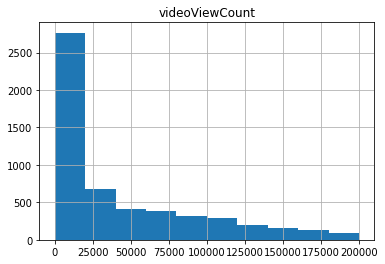

In [216]:
tmp = vc_df[vc_df['videoViewCount'] < 2e5]
print(tmp.shape)
tmp.hist('videoViewCount')
np.percentile(tmp['videoViewCount'], [0, 10, 50, 90, 95, 100])

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
channelTitle,,,,,,,,,,,,
Chess School,2186.0,30413.569991,63938.467890,1933.0,5693.0,6478.5,8726.5,13099.0,23382.0,61732.5,117965.5,1139811.0
Chess.com,1853.0,46457.719914,152486.912224,55.0,1874.4,2758.4,4900.0,11097.0,31539.0,85897.6,178991.0,2577197.0
agadmator's Chess Channel,1974.0,193195.134245,313874.425712,940.0,37601.6,50541.5,74808.0,114518.5,188126.0,362656.6,597721.0,5606876.0


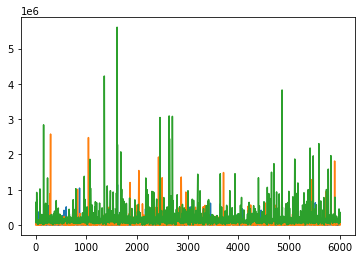

In [217]:
channel_view_grouped_df = vc_df.groupby('channelTitle')['videoViewCount']
channel_view_grouped_df.plot()
channel_view_grouped_df.describe(percentiles=[0.05,0.10,0.25,0.5,0.75,0.9,0.95])

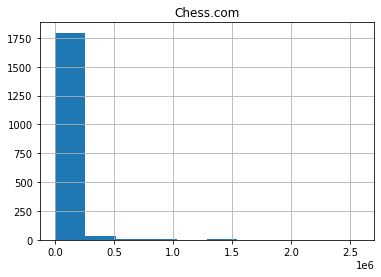

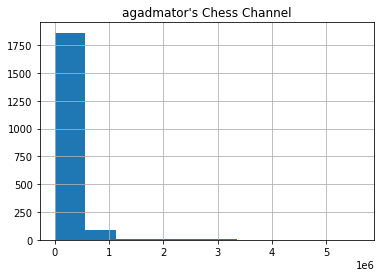

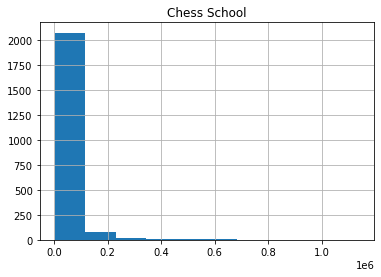

In [224]:
for channel_title in vc_df['channelTitle'].unique():
    ax = vc_df[vc_df['channelTitle'] == channel_title].hist('videoViewCount')
    ax[0][0].set_title(channel_title)

The above distributions show that the videoViewCount isn't normally distributed. So outlier removal using std deviation won't help. Validating this by actually performing it:
<br/>

### Std Deviation based outlier removal for videoViewCount

In [229]:
filtered_df = vc_df.copy()
for channel_title in filtered_df['channelTitle'].unique():
    tmp_df = filtered_df[filtered_df['channelTitle'] == channel_title]
    outlier_idx = tmp_df.index[np.abs(stats.zscore(tmp_df['videoViewCount'])) > 3]
    print('Outlier count for {}: {}'.format(channel_title, len(outlier_idx)))
    filtered_df.drop(outlier_idx, inplace=True, axis=0)

Outlier count for Chess.com: 26
Outlier count for agadmator's Chess Channel: 27
Outlier count for Chess School: 36


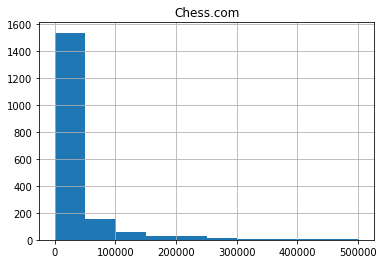

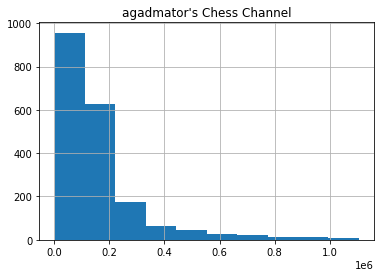

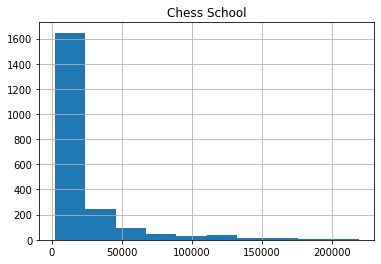

In [226]:
for channel_title in filtered_df['channelTitle'].unique():
    ax = filtered_df[filtered_df['channelTitle'] == channel_title].hist('videoViewCount')
    ax[0][0].set_title(channel_title)

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
channelTitle,,,,,,,,,,,,
Chess School,2150.0,24080.044651,31891.371102,1933.0,5686.5,6459.8,8606.75,12946.5,22320.0,53201.4,99861.25,219522.0
Chess.com,1827.0,31929.507937,59299.270941,55.0,1866.2,2750.8,4802.00,10819.0,30124.0,77452.8,141187.50,501599.0
agadmator's Chess Channel,1947.0,164865.093991,163399.169125,940.0,37406.8,50268.6,74313.00,112968.0,184572.0,329410.2,510689.60,1105979.0


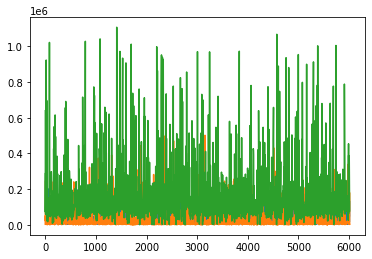

In [227]:
channel_view_grouped_df = filtered_df.groupby('channelTitle')['videoViewCount']
channel_view_grouped_df.plot()
channel_view_grouped_df.describe(percentiles=[0.05,0.10,0.25,0.5,0.75,0.9,0.95])

### IQR based outlier removal for videoViewCount

In [230]:
filtered_df = vc_df.copy()
for channel_title in filtered_df['channelTitle'].unique():
    tmp_df = filtered_df[filtered_df['channelTitle'] == channel_title]
    q25, q75 = np.percentile(tmp_df['videoViewCount'], [25, 75])
    iqr = q75 - q25
    outlier_idx = tmp_df.index[(tmp_df['videoViewCount'] < q25 - iqr*1.5) | 
                               (tmp_df['videoViewCount'] > q75 + iqr*1.5)]
    print('Outlier count for {}: {}'.format(channel_title, len(outlier_idx)))
    filtered_df.drop(outlier_idx, inplace=True, axis=0)

Outlier count for Chess.com: 224
Outlier count for agadmator's Chess Channel: 199
Outlier count for Chess School: 293


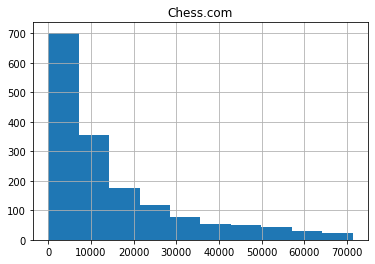

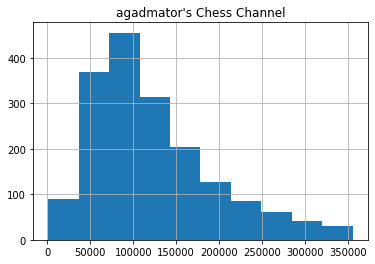

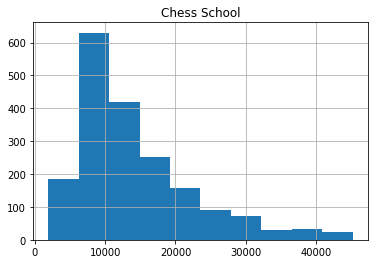

In [231]:
for channel_title in filtered_df['channelTitle'].unique():
    ax = filtered_df[filtered_df['channelTitle'] == channel_title].hist('videoViewCount')
    ax[0][0].set_title(channel_title)

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
channelTitle,,,,,,,,,,,,
Chess School,1893.0,14194.698362,8259.012469,1933.0,5583.6,6292.8,8173.0,11663.0,18025.0,25997.4,31668.2,45169.0
Chess.com,1629.0,15434.978514,15841.156237,55.0,1735.2,2582.4,4486.0,8770.0,20751.0,40152.4,53194.8,71290.0
agadmator's Chess Channel,1775.0,122509.602254,72100.899168,940.0,36451.4,48321.8,71051.5,105039.0,158404.5,226020.4,273910.7,355819.0


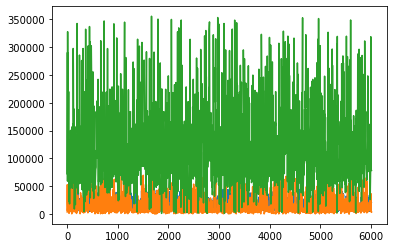

In [232]:
channel_view_grouped_df = filtered_df.groupby('channelTitle')['videoViewCount']
channel_view_grouped_df.plot()
channel_view_grouped_df.describe(percentiles=[0.05,0.10,0.25,0.5,0.75,0.9,0.95])

The above data seems to be free from outliers. We can now look at similar distributions for video likes and dislikes.

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
channelTitle,,,,,,,,,,,,
Chess School,1893.0,721.695193,278.627140,62.0,375.4,429.2,525.0,657.0,877.0,1108.8,1263.4,1874.0
Chess.com,1629.0,245.732965,301.755701,0.0,23.4,39.0,72.0,130.0,303.0,589.0,813.6,2631.0
agadmator's Chess Channel,1775.0,3750.498592,2338.236625,23.0,981.5,1337.6,2190.5,3155.0,4877.0,6930.6,8374.3,18110.0


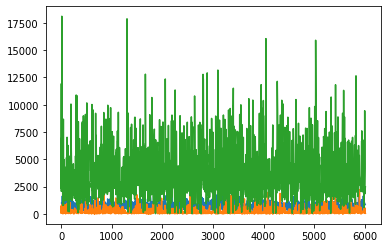

In [238]:
channel_view_grouped_df = filtered_df.groupby('channelTitle')['videoLikeCount']
channel_view_grouped_df.plot()
channel_view_grouped_df.describe(percentiles=[0.05,0.10,0.25,0.5,0.75,0.9,0.95])

In [249]:
print('Outliers based on video likes.\n')
for channel_title in filtered_df['channelTitle'].unique():
    tmp_df = filtered_df[filtered_df['channelTitle'] == channel_title]
    q25, q75 = np.percentile(tmp_df['videoLikeCount'], [25, 75])
    iqr = q75 - q25
    outlier_idx = tmp_df.index[(tmp_df['videoLikeCount'] < q25 - iqr*1.5) | 
                               (tmp_df['videoLikeCount'] > q75 + iqr*1.5)]
    print('Outlier count for {}: {}'.format(channel_title, len(outlier_idx)))

Outliers based on video likes.

Outlier count for Chess.com: 142
Outlier count for agadmator's Chess Channel: 63
Outlier count for Chess School: 44


,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
channelTitle,,,,,,,,,,,,
Chess School,1893.0,6.740095,6.116821,0.0,1.0,2.0,3.0,6.0,9.0,13.0,15.0,141.0
Chess.com,1629.0,9.674647,15.749879,0.0,0.0,1.0,2.0,5.0,12.0,22.0,31.6,370.0
agadmator's Chess Channel,1775.0,49.074930,36.559684,0.0,11.0,16.4,26.0,41.0,64.0,90.0,111.3,659.0


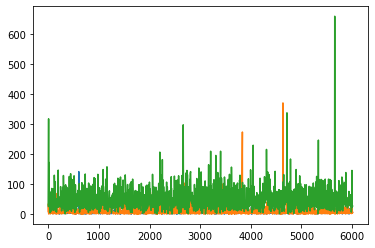

In [239]:
channel_view_grouped_df = filtered_df.groupby('channelTitle')['videoDislikeCount']
channel_view_grouped_df.plot()
channel_view_grouped_df.describe(percentiles=[0.05,0.10,0.25,0.5,0.75,0.9,0.95])

In [250]:
print('Outliers based on video dislikes.\n')
for channel_title in filtered_df['channelTitle'].unique():
    tmp_df = filtered_df[filtered_df['channelTitle'] == channel_title]
    q25, q75 = np.percentile(tmp_df['videoDislikeCount'], [25, 75])
    iqr = q75 - q25
    outlier_idx = tmp_df.index[(tmp_df['videoDislikeCount'] < q25 - iqr*1.5) | 
                               (tmp_df['videoDislikeCount'] > q75 + iqr*1.5)]
    print('Outlier count for {}: {}'.format(channel_title, len(outlier_idx)))

Outliers based on video dislikes.

Outlier count for Chess.com: 106
Outlier count for agadmator's Chess Channel: 59
Outlier count for Chess School: 49


Both likes and dislikes seem to have outliers still. Let's look at it as ratio w.r.t videoViewCount

In [252]:
tmp_df = filtered_df.copy()
tmp_df['likeRatio'] = tmp_df['videoLikeCount'] / tmp_df['videoViewCount']
tmp_df['dislikeRatio'] = tmp_df['videoDislikeCount'] / tmp_df['videoViewCount']

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
channelTitle,,,,,,,,,,,,
Chess School,1893.0,0.057251,0.016265,0.013743,0.031202,0.036813,0.046218,0.056923,0.067731,0.077453,0.084344,0.147473
Chess.com,1629.0,0.016796,0.008785,0.000000,0.007234,0.008605,0.010915,0.014799,0.019878,0.028891,0.035277,0.069282
agadmator's Chess Channel,1775.0,0.031042,0.008356,0.005679,0.018930,0.021117,0.025466,0.030547,0.035978,0.040993,0.044418,0.088450


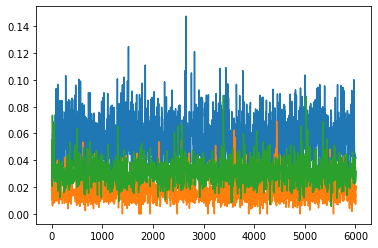

In [253]:
channel_view_grouped_df = tmp_df.groupby('channelTitle')['likeRatio']
channel_view_grouped_df.plot()
channel_view_grouped_df.describe(percentiles=[0.05,0.10,0.25,0.5,0.75,0.9,0.95])

In [254]:
print('Outliers based on like ratio.\n')
for channel_title in tmp_df['channelTitle'].unique():
    x_df = tmp_df[tmp_df['channelTitle'] == channel_title]
    q25, q75 = np.percentile(x_df['likeRatio'], [25, 75])
    iqr = q75 - q25
    outlier_idx = x_df.index[(x_df['likeRatio'] < q25 - iqr*1.5) | 
                               (x_df['likeRatio'] > q75 + iqr*1.5)]
    print('Outlier count for {}: {}'.format(channel_title, len(outlier_idx)))

Outliers based on like ratio.

Outlier count for Chess.com: 104
Outlier count for agadmator's Chess Channel: 29
Outlier count for Chess School: 16


,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
channelTitle,,,,,,,,,,,,
Chess School,1893.0,0.000542,0.000442,0.0,0.000098,0.000144,0.000257,0.000432,0.000713,0.001032,0.001309,0.007028
Chess.com,1629.0,0.000768,0.001088,0.0,0.000000,0.000114,0.000301,0.000515,0.000897,0.001474,0.002017,0.015075
agadmator's Chess Channel,1775.0,0.000414,0.000212,0.0,0.000230,0.000260,0.000315,0.000379,0.000450,0.000561,0.000691,0.003729


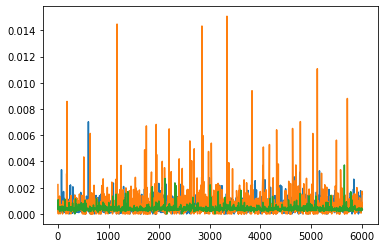

In [255]:
channel_view_grouped_df = tmp_df.groupby('channelTitle')['dislikeRatio']
channel_view_grouped_df.plot()
channel_view_grouped_df.describe(percentiles=[0.05,0.10,0.25,0.5,0.75,0.9,0.95])

In [256]:
print('Outliers based on dislike ratio.\n')
for channel_title in tmp_df['channelTitle'].unique():
    x_df = tmp_df[tmp_df['channelTitle'] == channel_title]
    q25, q75 = np.percentile(x_df['dislikeRatio'], [25, 75])
    iqr = q75 - q25
    outlier_idx = x_df.index[(x_df['dislikeRatio'] < q25 - iqr*1.5) | 
                               (x_df['dislikeRatio'] > q75 + iqr*1.5)]
    print('Outlier count for {}: {}'.format(channel_title, len(outlier_idx)))

Outliers based on dislike ratio.

Outlier count for Chess.com: 108
Outlier count for agadmator's Chess Channel: 107
Outlier count for Chess School: 81


Let's look at the ratio of dislikes to likes and observe the distribution.

In [269]:
tmp_df['dislike_like_ratio'] = tmp_df['videoDislikeCount'] / (tmp_df['videoLikeCount'] + 1e-6)
print('Outliers based on dislike-like ratio.\n')
for channel_title in tmp_df['channelTitle'].unique():
    x_df = tmp_df[tmp_df['channelTitle'] == channel_title]
    q25, q75 = np.percentile(x_df['dislike_like_ratio'], [25, 75])
    iqr = q75 - q25
    outlier_idx = x_df.index[(x_df['dislike_like_ratio'] < q25 - iqr*1.5) | 
                               (x_df['dislike_like_ratio'] > q75 + iqr*1.5)]
    print('Outlier count for {}: {}'.format(channel_title, len(outlier_idx)))

Outliers based on dislike-like ratio.

Outlier count for Chess.com: 122
Outlier count for agadmator's Chess Channel: 108
Outlier count for Chess School: 84


,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
channelTitle,,,,,,,,,,,,
Chess School,1893.0,0.009837,0.008712,0.0,0.001681,0.002747,0.004769,0.008182,0.012346,0.017988,0.022937,0.144764
Chess.com,1629.0,0.055705,0.115154,0.0,0.000000,0.007692,0.019231,0.033708,0.059829,0.100000,0.153846,2.999997
agadmator's Chess Channel,1775.0,0.014451,0.009820,0.0,0.006875,0.007919,0.009868,0.012463,0.015721,0.020673,0.025914,0.110795


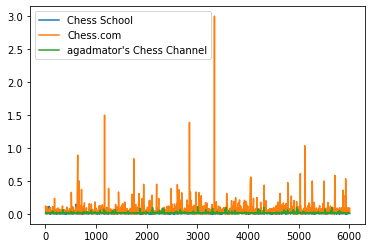

In [270]:
channel_view_grouped_df = tmp_df.groupby('channelTitle')['dislike_like_ratio']
channel_view_grouped_df.plot(legend=True)
channel_view_grouped_df.describe(percentiles=[0.05,0.10,0.25,0.5,0.75,0.9,0.95])

The dislike-like ratio clearly shows the presence of strong outliers. 

## Hypothesis #1:

Videos that have high dislike-like ratio (q75 <= dlr < q75 + iqr * 1.5) and the ones that have low dislike-like ratio (q25 - iqr * 1.5 < dlr <= q25) differ significantly in terms of features like ['pausedur',
       'speakingrate', 'articulationrate', 'asd', 'unvoicedcount',
       'rms_intensity']

Valid indices count for Chess.com: 694
Valid indices count for agadmator's Chess Channel: 780
Valid indices count for Chess School: 864


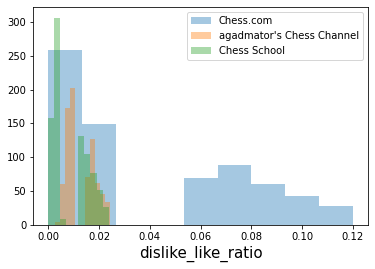

In [304]:
h1_df = tmp_df.copy()
valid_indices = []
for channel_title in h1_df['channelTitle'].unique():
    x_df = h1_df[h1_df['channelTitle'] == channel_title]
    
    q25, q75 = np.percentile(x_df['dislike_like_ratio'], [25, 75])
    iqr = q75 - q25
    
    valid_idx = x_df.index[((x_df['dislike_like_ratio'] >= q75) & 
                            (x_df['dislike_like_ratio'] < q75 + iqr*1.5)) | 
                           ((x_df['dislike_like_ratio'] > q25 - iqr*1.5) & 
                            (x_df['dislike_like_ratio'] <= q25))]
    print('Valid indices count for {}: {}'.format(channel_title, len(valid_idx)))
    valid_indices.extend(valid_idx.tolist())
    sns.distplot(x_df.loc[valid_idx.tolist()]['dislike_like_ratio'], label=channel_title, kde=False)
    
plt.legend()

The above plot shows that the different channels have different ranges for the dislike-like ratio and should be studied independently.

Low dlr indices count for Chess.com: 408
High dlr indices count for Chess.com: 286

Low dlr indices count for agadmator's Chess Channel: 440
High dlr indices count for agadmator's Chess Channel: 340

Low dlr indices count for Chess School: 474
High dlr indices count for Chess School: 390



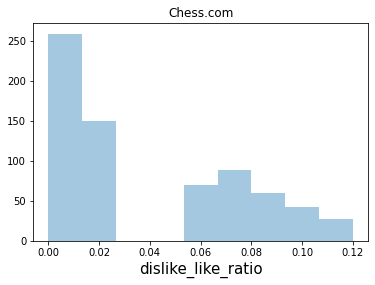

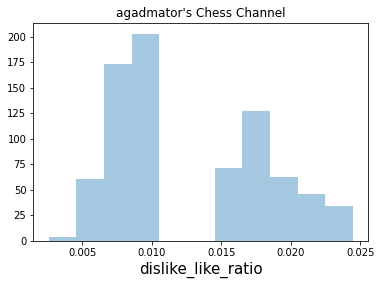

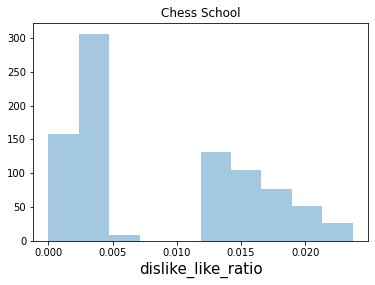

In [309]:
low_dlr_indices = []
high_dlr_indices = []

for channel_title in h1_df['channelTitle'].unique():
    x_df = h1_df[h1_df['channelTitle'] == channel_title]
    
    q25, q75 = np.percentile(x_df['dislike_like_ratio'], [25, 75])
    iqr = q75 - q25
    
    channel_idx = []
    
    valid_idx = x_df.index[((x_df['dislike_like_ratio'] <= q25) & 
                            (x_df['dislike_like_ratio'] > q25 - iqr*1.5))]
    
    channel_idx.extend(valid_idx.tolist())
    
    print('Low dlr indices count for {}: {}'.format(channel_title, len(valid_idx)))
    low_dlr_indices.extend(valid_idx.tolist())
    
    valid_idx = x_df.index[((x_df['dislike_like_ratio'] >= q75) & 
                            (x_df['dislike_like_ratio'] < q75 + iqr*1.5))]
    
    channel_idx.extend(valid_idx.tolist())
    
    print('High dlr indices count for {}: {}\n'.format(channel_title, len(valid_idx)))
    high_dlr_indices.extend(valid_idx.tolist())
    
    plt.figure()
    sns.distplot(x_df.loc[channel_idx]['dislike_like_ratio'], kde=False)
    plt.title(channel_title)
    
plt.show()

In [310]:
tgt_cols = ['pausedur', 'speakingrate', 'articulationrate', 'asd', 'unvoicedcount', 'rms_intensity']

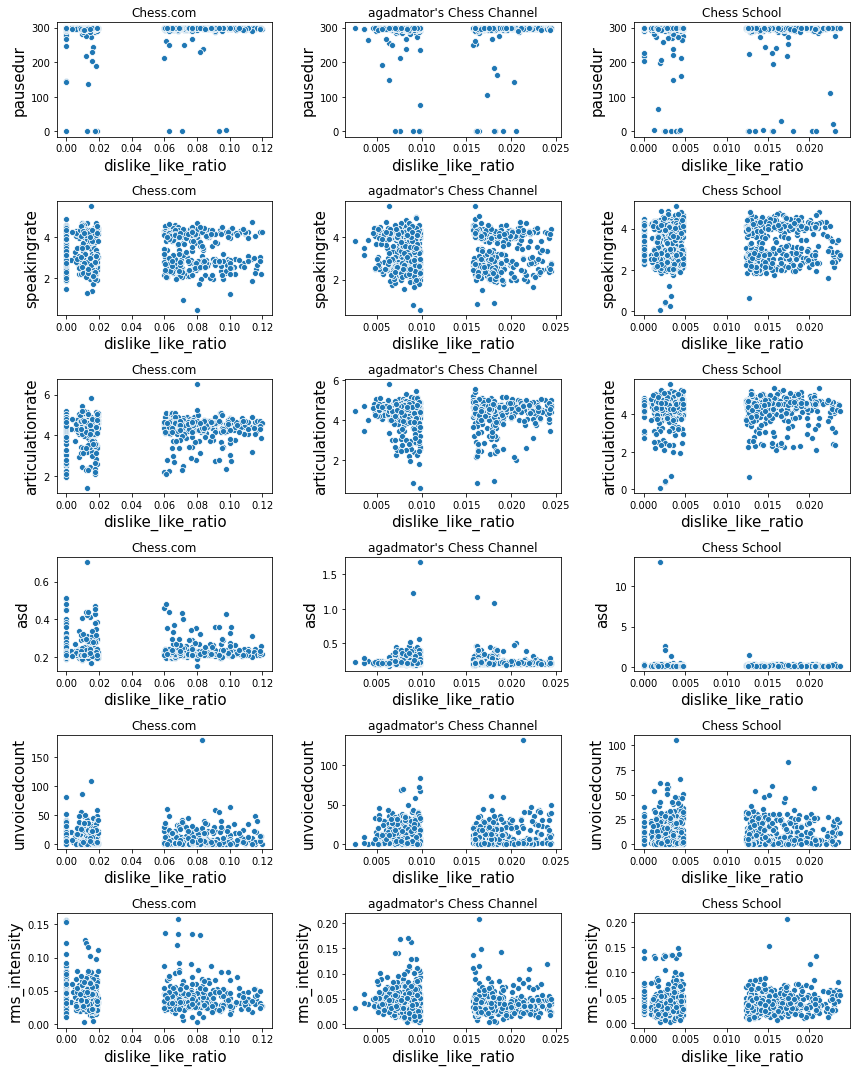

In [317]:
channels = h1_df['channelTitle'].unique().tolist()
n_channels = len(channels)

fig, ax = plt.subplots(nrows=len(tgt_cols), ncols=n_channels, figsize=(2 * len(tgt_cols), 5 * n_channels))

for row_idx, col in enumerate(tgt_cols):
    df = h1_df.loc[low_dlr_indices + high_dlr_indices]
    for col_idx, channel in enumerate(channels):
        channel_df = df[df['channelTitle'] == channel]
        sns.scatterplot(x=channel_df['dislike_like_ratio'], y=channel_df[col], ax=ax[row_idx][col_idx])
        ax[row_idx][col_idx].set_xlabel('dislike_like_ratio')
        ax[row_idx][col_idx].set_ylabel(col)
        ax[row_idx][col_idx].set_title(channel)

plt.tight_layout()
plt.show()

The above plots do not show any distinct patterns that differentiate between low and high dislike-like ratio files for different features. Thus the hypothesis is probably **Invalid**.
<br/>
Note: This above test is inconclusive as the data gathered is for the first five minutes only. We should repeat the above test for different durations for the same set of files.

### Todo: 
1. Fit linear regression model using speech features to predict dislike-like ratio. Then use the p-values or VIF to determine if the predictors are useful.
2. Extract speech features for longer chunks (pad for smaller) and repeat the above analysis with time as additional dimension in an interactive plot.

# MLP Experiment

### 1. PCA feature reduction
Reduce the feature size using PCA to train a MLP.

References:
1. https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6
2. https://stats.stackexchange.com/questions/271765/how-to-evaluate-estimated-principal-components
3. https://stats.stackexchange.com/questions/93845/how-to-perform-cross-validation-for-pca-to-determine-the-number-of-principal-com
4. http://alexhwilliams.info/itsneuronalblog/2018/02/26/crossval/

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(0)
data_path = '/ssd_scratch/users/mounika.k/chess_features'
filenames = sorted(os.listdir('/ssd_scratch/users/mounika.k/chess_features/mfcc/'))
np.random.shuffle(filenames)

filenames[:5]

['1ZL-J3F85NA.npy',
 'iT5LBG__XbU.npy',
 'FX4A6TgcaMM.npy',
 '_3xf5-4HG28.npy',
 '0MLhdvwoAx0.npy']

In [3]:
def load_features(data_path, filenames, index):
    mfcc = np.load(data_path + '/mfcc/' + filenames[index])
    pitches = np.load(data_path + '/pitches/' + filenames[index])
    rmse = np.load(data_path + '/rmse/' + filenames[index])
    vc = np.load(data_path + '/vc/' + filenames[index])
#     print('mfcc', mfcc.shape)
#     print('pitches', pitches.shape)
#     print('rmse', rmse.shape)
#     print('vc', vc.shape)
    features = np.concatenate([mfcc, pitches, rmse.reshape(1, -1)]).reshape(-1)
#     print('features.shape', features.shape)
    features = np.concatenate([features, vc])
#     print('features.shape', features.shape)
    X = features
    if features.shape[0] != 9807301:
        X =  np.concatenate([X, np.zeros([1,])])
        print('padding', features.shape, X.shape)

    return X.astype(np.float32)

In [4]:
# train_test_split = 0.8
# train_filenames = filenames[:int(len(filenames) * train_test_split)]
# test_filenames = filenames[int(len(filenames) * train_test_split):]

In [5]:
# np.random.seed(0)

# pca_indices = np.random.randint(0, len(train_filenames), 32)
# train_data = np.array([load_features(data_path, train_filenames, idx) for idx in pca_indices])

# scaler = StandardScaler()
# train_data = scaler.fit_transform(train_data)

# pca = PCA(n_components=0.9)
# pca.fit(train_data)

# print(len(pca.components_))
# print(sum(pca.explained_variance_ratio_)*100)

In [6]:
# test_indices = np.random.randint(0, len(test_filenames), 32)
# test_data = np.array([load_features(data_path, test_filenames, idx) for idx in test_indices])

# projected_data = pca.transform(scaler.transform(test_data))
# reconstructed_data = scaler.inverse_transform(pca.inverse_transform(projected_data))

# # to save memory
# del projected_data

In [7]:
# sklearn.metrtest_data - reconstructed_data

In [8]:
data = np.array([load_features(data_path, filenames, idx) for idx in range(0,32)])

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [9]:
def censored_lstsq(A, B, M):
    """Least squares of M * (AX - B) over X, where M is a masking matrix.
    """
#     rhs = np.dot(A.T, M * B).T[:,:,None] # n x r x 1 tensor
#     T = np.matmul(A.T[None,:,:], M.T[:,:,None] * A[None,:,:])
#     print(T.shape, rhs.shape)
    return np.linalg.lstsq(M*A, rhs).reshape(A.shape[1], B.shape[1]).astype(np.float32)

def cv_pca(data, rank, p_holdout=.1):
    """Fit PCA while holding out a fraction of the dataset.
    """
    # create masking matrix
    M = np.random.rand(*data.shape) < p_holdout

    # fit pca
    U = np.random.randn(data.shape[0], rank).astype(np.float32)
    for itr in range(1):
        Vt = censored_lstsq(U, data, M)
        U = censored_lstsq(Vt.T, data.T, M.T).T

    # We could orthogonalize U and Vt and then rotate to align
    # with directions of maximal variance, but we won't bother.

    # return result and test/train error
    resid = np.dot(U, Vt) - data
    train_err = np.mean(resid[M]**2)
    test_err = np.mean(resid[~M]**2)
    return train_err, test_err

In [13]:
cv_pca(data, 8)

(9807301, 8, 8) (9807301, 8, 1)


LinAlgError: 3-dimensional array given. Array must be two-dimensional

In [10]:
M = np.random.rand(*data.shape) < 0.1

In [11]:
U = np.random.randn(data.shape[0], 8).astype(np.float32)

In [12]:
# np.linalg.lstsq(M*U, M*B)

In [13]:
(M.T[:,:,None] * U[None,:,:]).shape

(9807301, 32, 8)